# AutoEncoder using Fashion MNIST

In this notebook we Tensorflow/Keras to build an encoder for the MNIST fashion images. 

We start using encoder layers of size 400, 200, 100, 50, N neurons and then 50, 100, 200, 400 for the decoder

We examine how the quality of the reconstruction depends on the value of N.

We examine how the quality of the reconstruction depends on the number of layers to find the optimal architecture.

Eventually, we examine the performance of our "optimal" model on different shape clothes.

The Fashion MNIST dataset consists of 70,000 (60,000 sample training set and 10,000 sample test set) 28x28 grayscale images belonging to one of 10 different clothing article classes.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
X_train_s, X_test_s = X_train.reshape(60000, 784) / 255, X_test.reshape(10000, 784) / 255

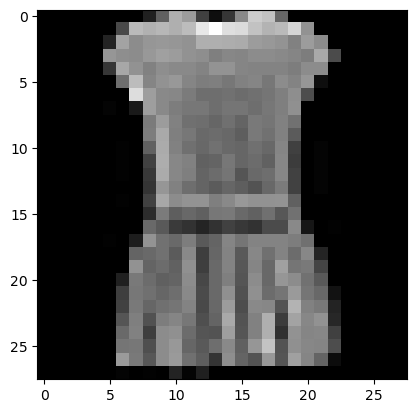

In [5]:
# pick a sample to plot
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
X_train_s[0]
Y_train[0]

9

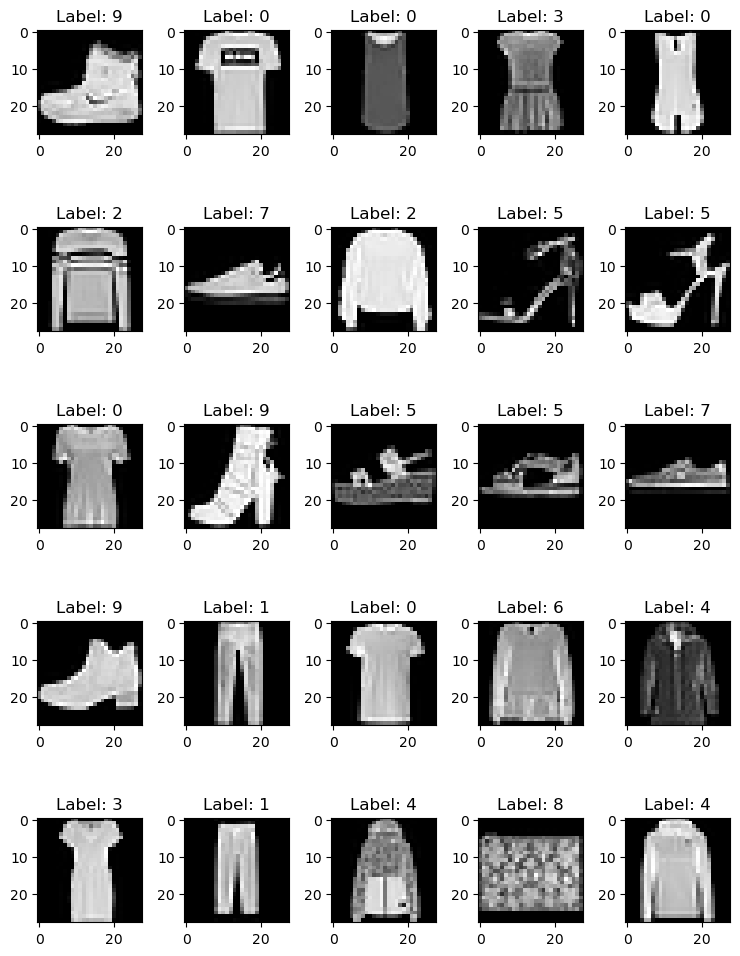

In [7]:
# specify the number of rows and columns you want to see
num_row = 5
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()
#0, 1, 3, 5, 6, 8, 16, 18, 19,23

### 1) Do so using encoder layers of size 400, 200, 100, 50, N neurons and then 50, 100, 200, 400 for the decoder

In [8]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

In [9]:
def autoencoder(N):
    
    encoder = Sequential()
    encoder.add(Dense(400,  activation='relu', input_shape=(784,)))
    encoder.add(Dense(200,  activation='relu'))
    encoder.add(Dense(100,  activation='relu'))
    encoder.add(Dense(50,   activation='relu'))
    encoder.add(Dense(N,   activation='relu'))
    
    decoder = Sequential()
    decoder.add(Dense(50,  input_shape=[N], activation='relu'))
    decoder.add(Dense(100,  activation='relu'))
    decoder.add(Dense(200,  activation='relu'))
    decoder.add(Dense(400,  activation='relu'))
    decoder.add(Dense(784,  activation='sigmoid'))
    
    autoencoder = Sequential([encoder, decoder])
    
    autoencoder.compile(loss='MSE', optimizer = Adam())
    
    return autoencoder

In [10]:
def autoencodermorelayer(N):
    
    encoder = Sequential()
    encoder.add(Dense(400,  activation='relu', input_shape=(784,)))
    encoder.add(Dense(200,  activation='relu'))
    encoder.add(Dense(100,  activation='relu'))
    encoder.add(Dense(50,   activation='relu'))
    encoder.add(Dense(25,   activation='relu'))
    encoder.add(Dense(N,   activation='relu'))
    
    decoder = Sequential()
    decoder.add(Dense(25,  input_shape=[N], activation='relu'))
    decoder.add(Dense(50,  activation='relu'))
    decoder.add(Dense(100,  activation='relu'))
    decoder.add(Dense(200,  activation='relu'))
    decoder.add(Dense(400,  activation='relu'))
    decoder.add(Dense(784,  activation='sigmoid'))
    
    autoencoder = Sequential([encoder, decoder])
    
    autoencoder.compile(loss='MSE', optimizer = Adam())
    
    return autoencoder

In [11]:
def autoencoderlesslayer(N):
    
    encoder = Sequential()
    encoder.add(Dense(400,  activation='relu', input_shape=(784,)))
    encoder.add(Dense(200,  activation='relu'))
    encoder.add(Dense(100,  activation='relu'))
    encoder.add(Dense(N,   activation='relu'))
    
    decoder = Sequential()
    decoder.add(Dense(100,  input_shape=[N], activation='relu'))
    decoder.add(Dense(200,  activation='relu'))
    decoder.add(Dense(400,  activation='relu'))
    decoder.add(Dense(784,  activation='sigmoid'))
    
    autoencoder = Sequential([encoder, decoder])
    
    autoencoder.compile(loss='MSE', optimizer = Adam())
    
    return autoencoder

In [12]:
def autoencodertwolesslayer(N):
    
    encoder = Sequential()
    encoder.add(Dense(400,  activation='relu', input_shape=(784,)))
    encoder.add(Dense(100,  activation='relu'))
    encoder.add(Dense(N,   activation='relu'))
    
    decoder = Sequential()
    decoder.add(Dense(100,  input_shape=[N], activation='relu'))
    decoder.add(Dense(400,  activation='relu'))
    decoder.add(Dense(784,  activation='sigmoid'))
    
    autoencoder = Sequential([encoder, decoder])
    
    autoencoder.compile(loss='MSE', optimizer = Adam())
    
    return autoencoder

### 2) Examine how the quality of the reconstruction depends on the value of N. Is there a minimum value of N at which it no longer works ?

In [13]:
results = pd.DataFrame(index=['MSE'])

In [14]:
for N in [50, 25, 10, 5, 1]:
    trained_model = autoencoder(N).fit(X_train_s, X_train_s, batch_size=1024, 
                                epochs=10, verbose=0, 
                                validation_data=(X_test_s, X_test_s))
    results[N] = trained_model.history['val_loss'][-1]

In [15]:
results

,50,25,10,5,1
MSE,0.019179,0.019397,0.020973,0.02525,0.043298


We observe that keeping the same number of neurons gives the lowest MSE but the gap is really thin between the N= 50 and N = 5 model so the N=5 might be more interesting as it has the ability to decode image with less dimensions.


Let's try one image with these different parameters to see if these differences in accuracy are observable.

In [16]:
trained_modelN50 = autoencoder(50).fit(X_train_s, X_train_s, batch_size=1024, 
                            epochs=10, verbose=0, 
                            validation_data=(X_test_s, X_test_s))

1/1 [==============================] - 0s 255ms/step
Original Image


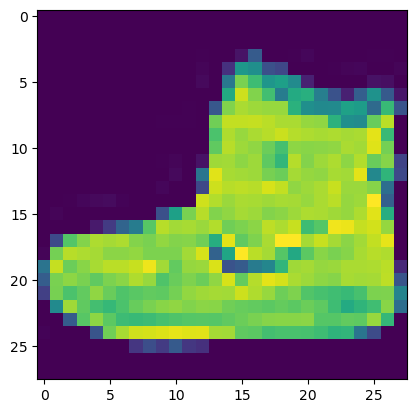

Reconstructed Image


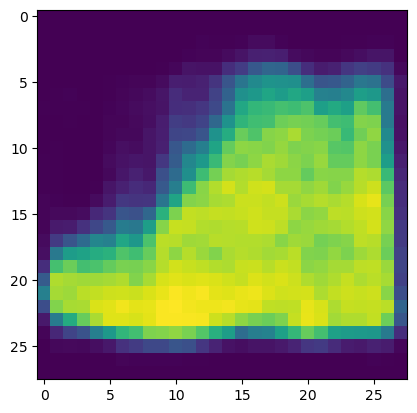

[4.15529299]
1/1 [==============================] - 0s 30ms/step
Original Image


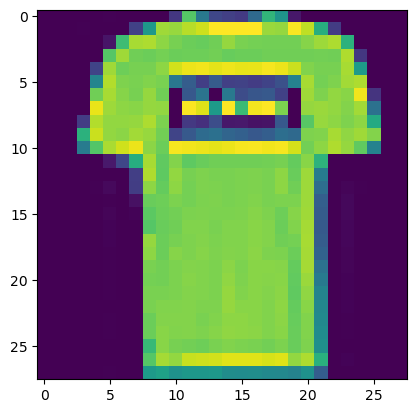

Reconstructed Image


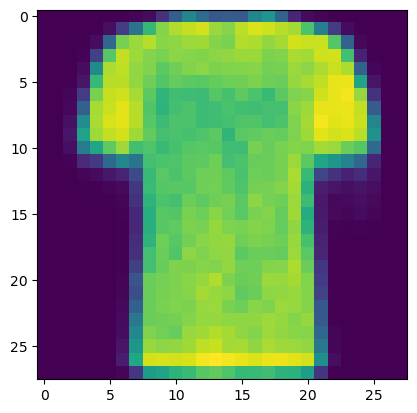

[4.39691052]
1/1 [==============================] - 0s 33ms/step
Original Image


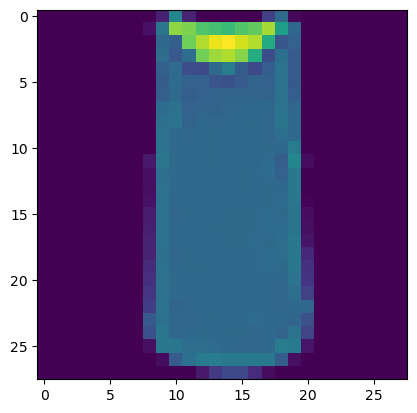

Reconstructed Image


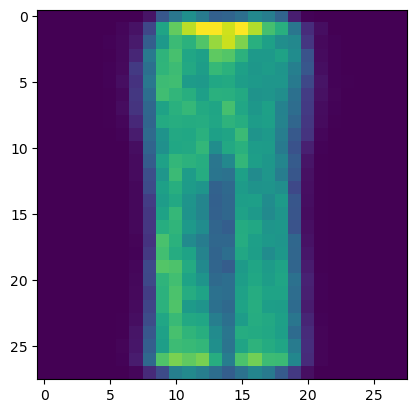

[2.51212885]
1/1 [==============================] - 0s 28ms/step
Original Image


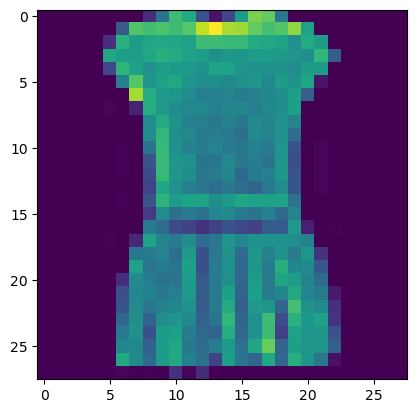

Reconstructed Image


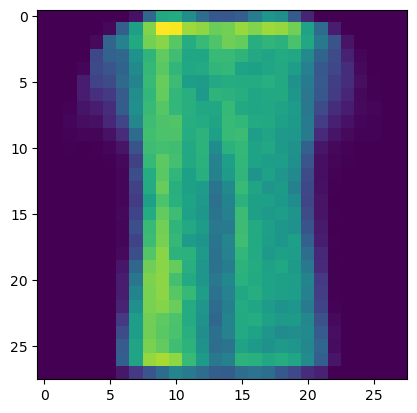

[3.40503962]
1/1 [==============================] - 0s 37ms/step
Original Image


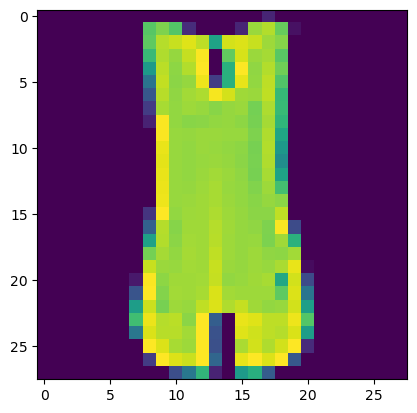

Reconstructed Image


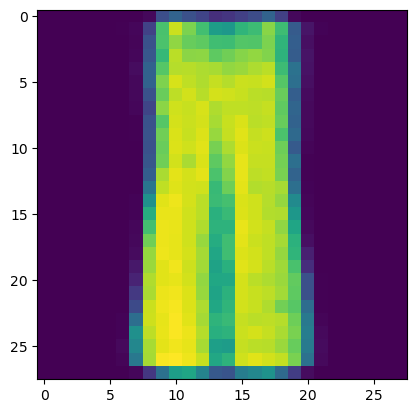

[3.99025927]
1/1 [==============================] - 0s 38ms/step
Original Image


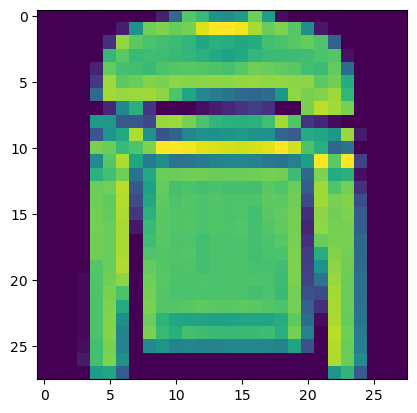

Reconstructed Image


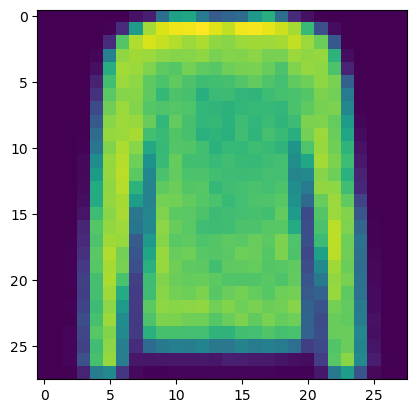

[4.13237228]
1/1 [==============================] - 0s 30ms/step
Original Image


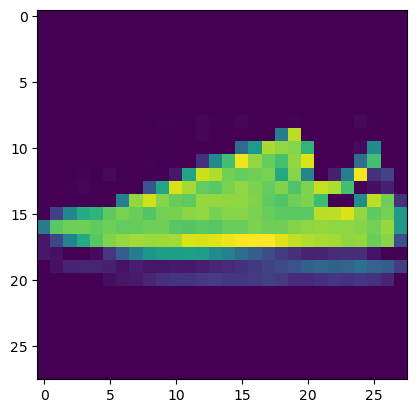

Reconstructed Image


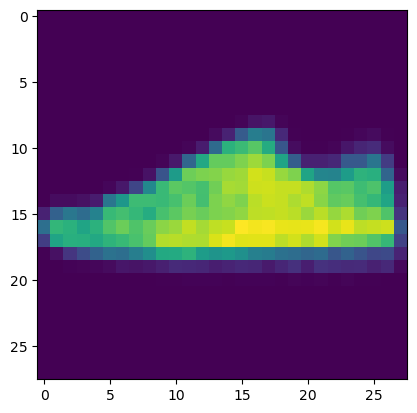

[3.45588197]
1/1 [==============================] - 0s 34ms/step
Original Image


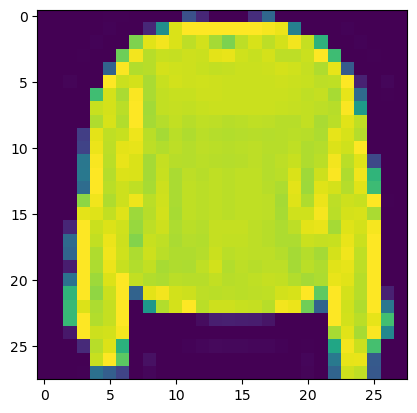

Reconstructed Image


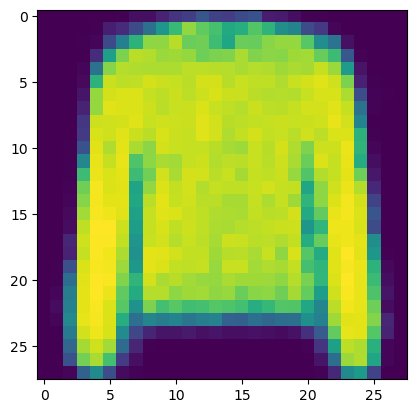

[4.34547993]
1/1 [==============================] - 0s 28ms/step
Original Image


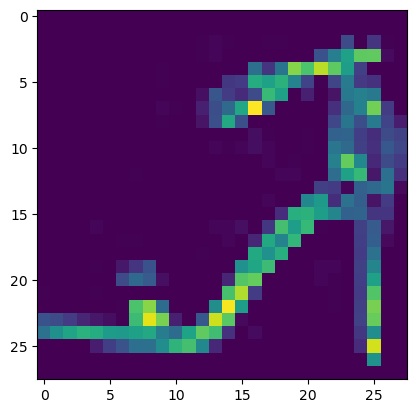

Reconstructed Image


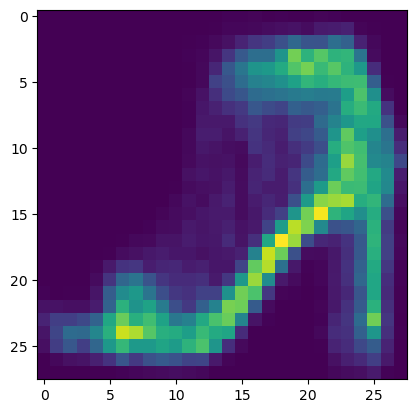

[3.87366014]


In [17]:
for i in range(0,9):
    x_img = X_train_s[i]
    inputs = x_img.reshape(1,784)
    target_data = trained_modelN50.model.predict(inputs)
    dist = np.linalg.norm(inputs - target_data, axis=-1)
    print("Original Image")
    plt.imshow(X_train[i])
    plt.show()
    print("Reconstructed Image")
    plt.imshow(target_data.reshape(28,28))
    plt.show()
    print(dist)

In [18]:
trained_modelN5 = autoencoder(5).fit(X_train_s, X_train_s, batch_size=1024, 
                            epochs=10, verbose=0, 
                            validation_data=(X_test_s, X_test_s))

1/1 [==============================] - 0s 122ms/step
Original Image


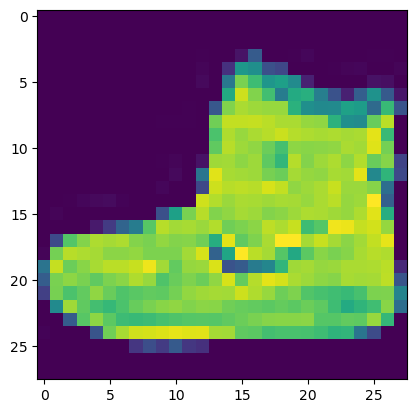

Reconstructed Image


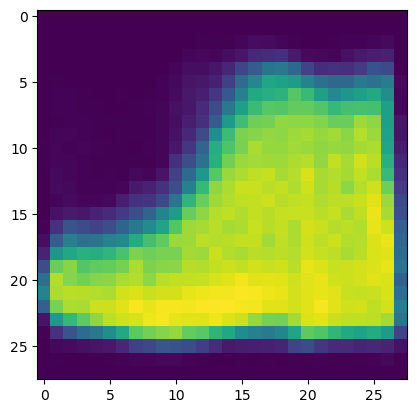

[3.97154134]
1/1 [==============================] - 0s 30ms/step
Original Image


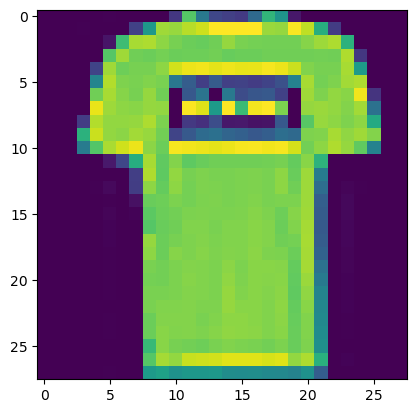

Reconstructed Image


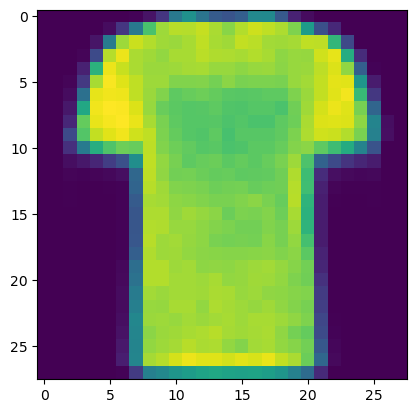

[4.54112718]
1/1 [==============================] - 0s 38ms/step
Original Image


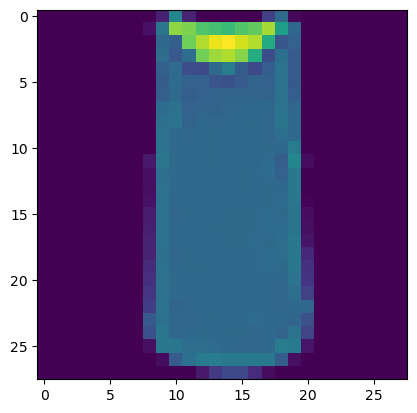

Reconstructed Image


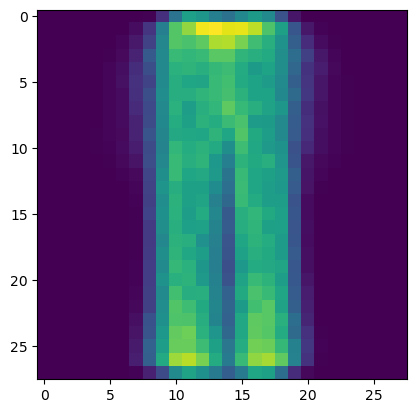

[2.5888615]
1/1 [==============================] - 0s 23ms/step
Original Image


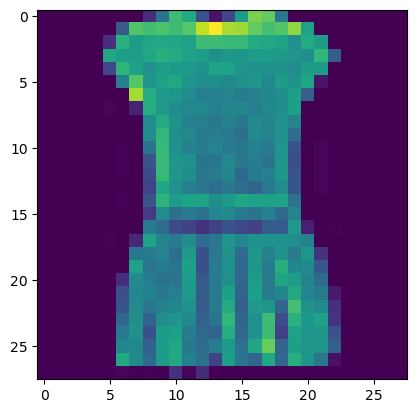

Reconstructed Image


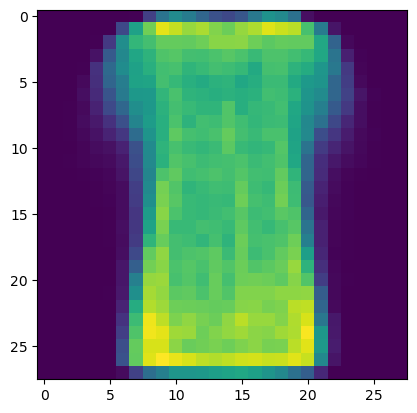

[3.50284958]
1/1 [==============================] - 0s 38ms/step
Original Image


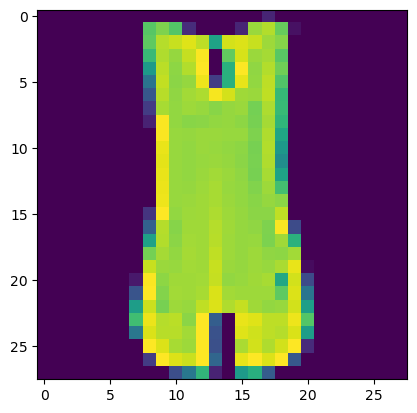

Reconstructed Image


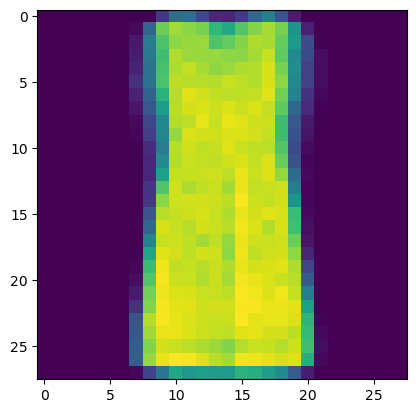

[4.26846679]
1/1 [==============================] - 0s 57ms/step
Original Image


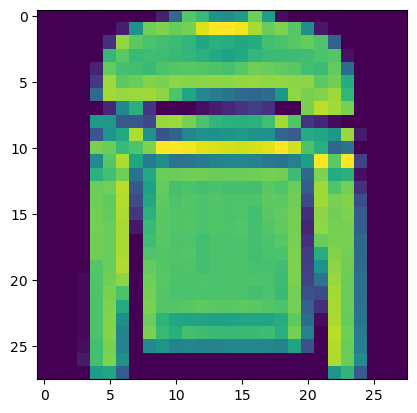

Reconstructed Image


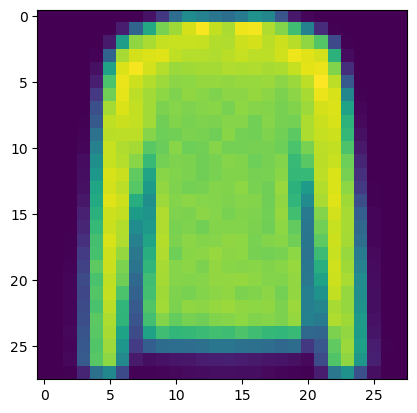

[4.50440306]
1/1 [==============================] - 0s 32ms/step
Original Image


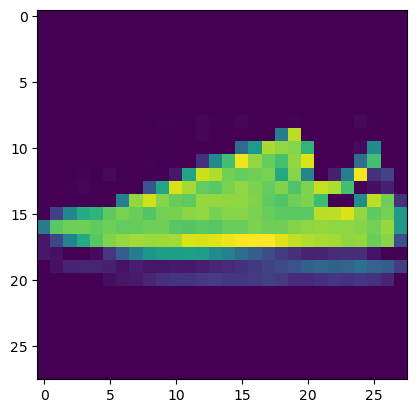

Reconstructed Image


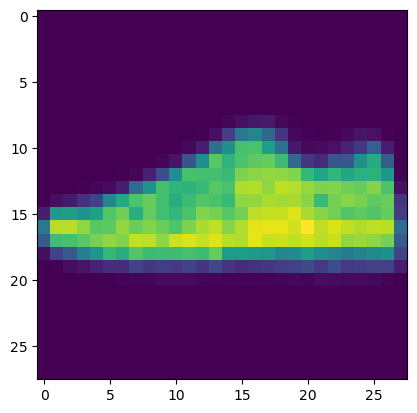

[3.66060602]
1/1 [==============================] - 0s 25ms/step
Original Image


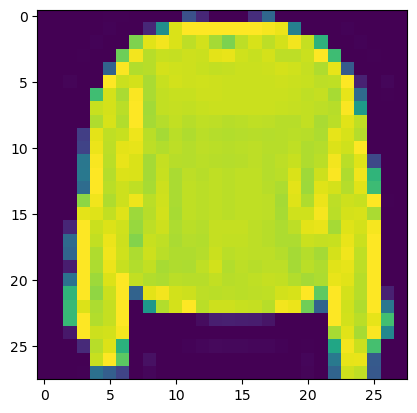

Reconstructed Image


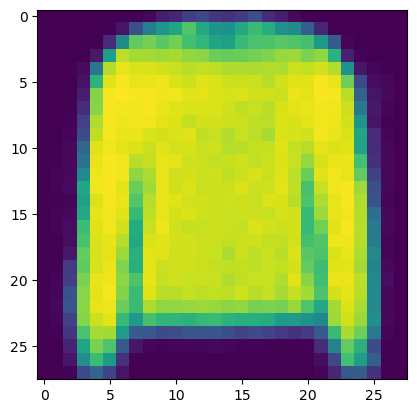

[4.90075417]
1/1 [==============================] - 0s 33ms/step
Original Image


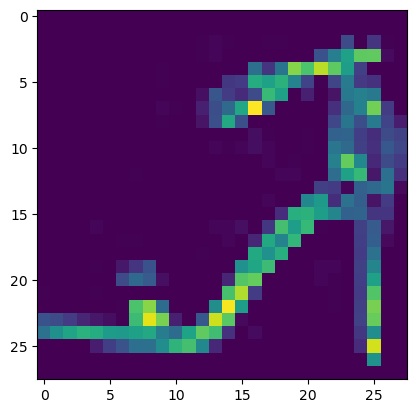

Reconstructed Image


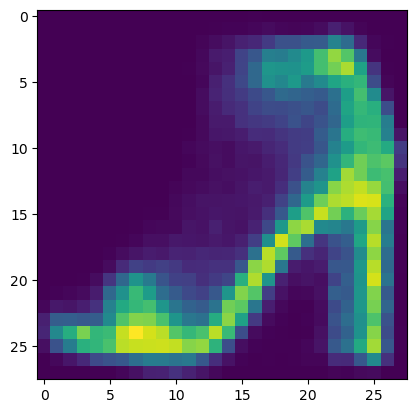

[4.00441892]


In [19]:
for i in range(0,9):
    x_img = X_train_s[i]
    inputs = x_img.reshape(1,784)
    target_data = trained_modelN5.model.predict(inputs)
    dist = np.linalg.norm(inputs - target_data, axis=-1)
    print("Original Image")
    plt.imshow(X_train[i])
    plt.show()
    print("Reconstructed Image")
    plt.imshow(target_data.reshape(28,28))
    plt.show()
    print(dist)

In [20]:
trained_modelN1 = autoencoder(1).fit(X_train_s, X_train_s, batch_size=1024, 
                            epochs=10, verbose=0, 
                            validation_data=(X_test_s, X_test_s))

1/1 [==============================] - 0s 109ms/step
Original Image


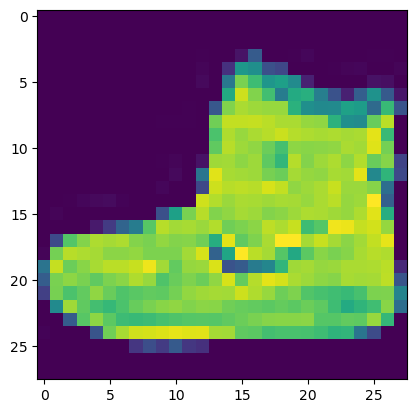

Reconstructed Image


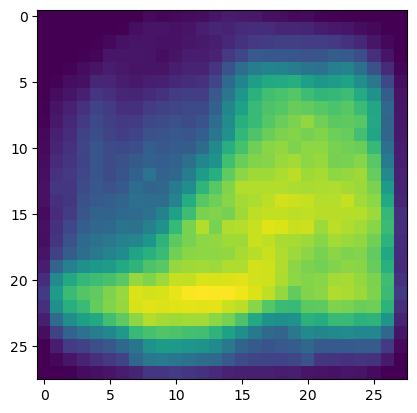

[6.39899343]
1/1 [==============================] - 0s 36ms/step
Original Image


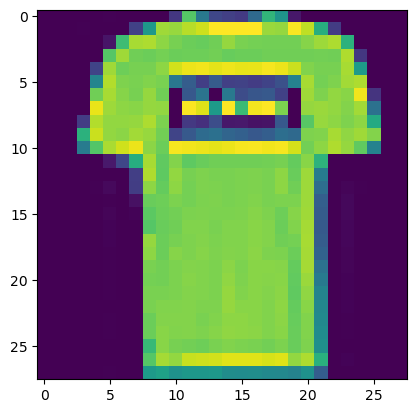

Reconstructed Image


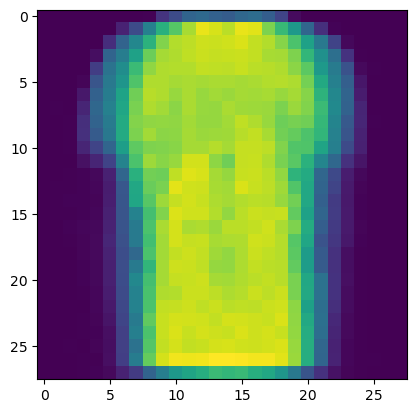

[6.60015509]
1/1 [==============================] - 0s 32ms/step
Original Image


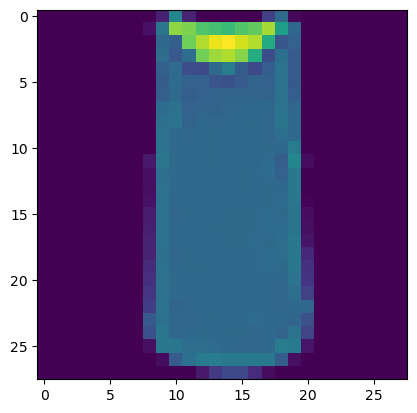

Reconstructed Image


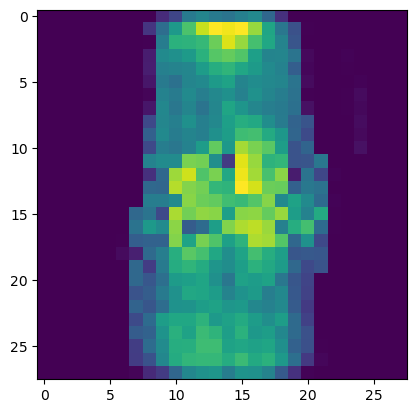

[3.0099561]
1/1 [==============================] - 0s 42ms/step
Original Image


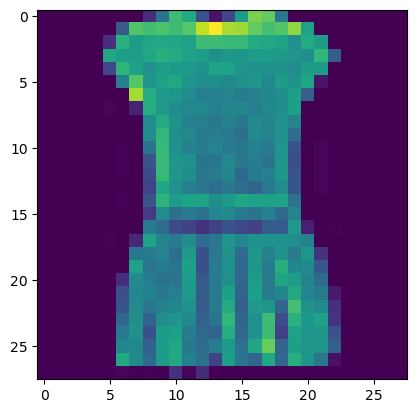

Reconstructed Image


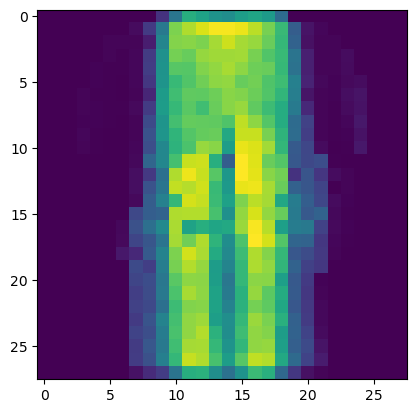

[5.1707619]
1/1 [==============================] - 0s 29ms/step
Original Image


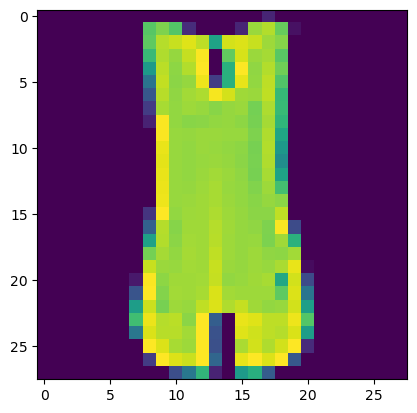

Reconstructed Image


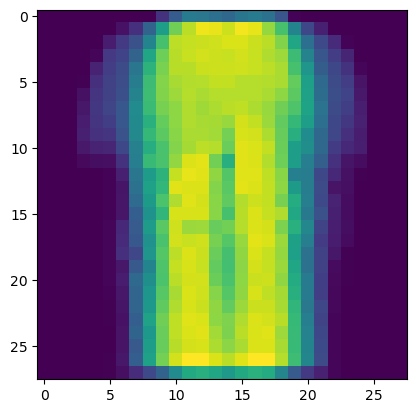

[5.95533688]
1/1 [==============================] - 0s 49ms/step
Original Image


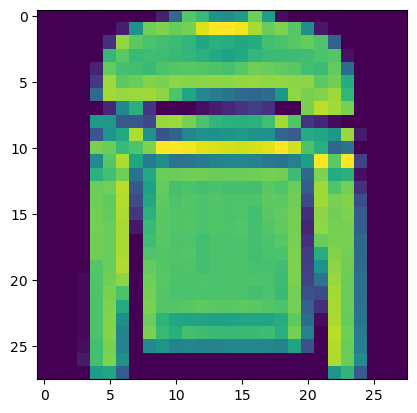

Reconstructed Image


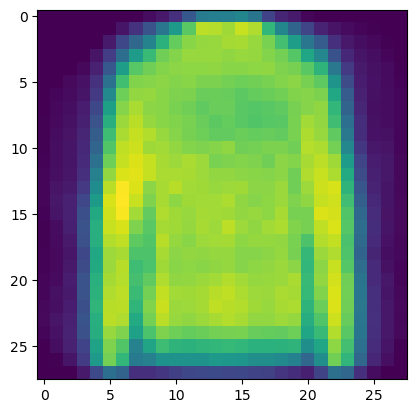

[5.69449083]
1/1 [==============================] - 0s 34ms/step
Original Image


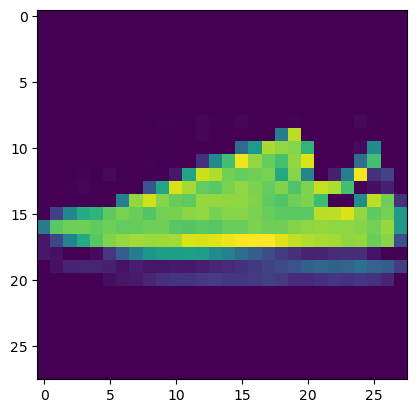

Reconstructed Image


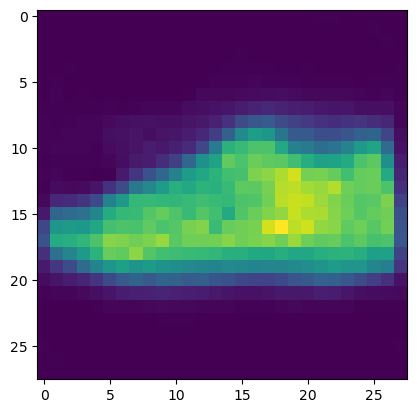

[4.67400228]
1/1 [==============================] - 0s 28ms/step
Original Image


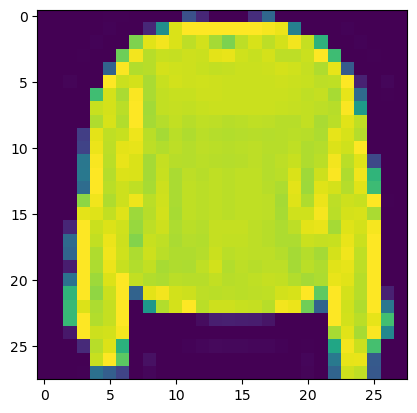

Reconstructed Image


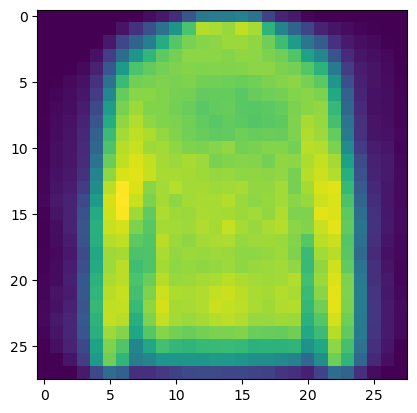

[9.37668975]
1/1 [==============================] - 0s 44ms/step
Original Image


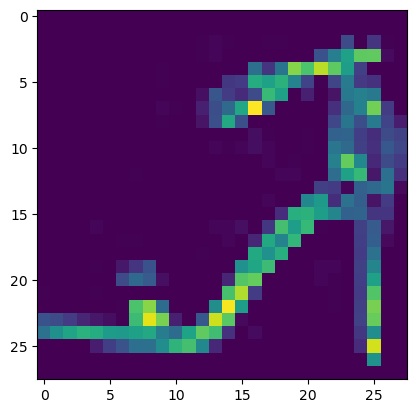

Reconstructed Image


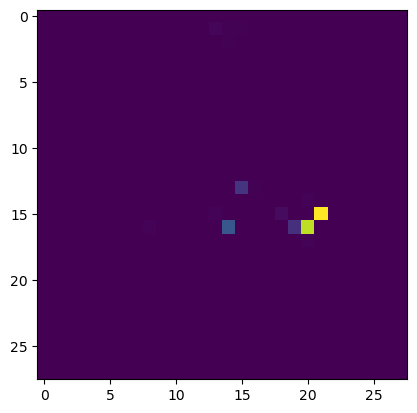

[6.40919872]


In [21]:
for i in range(0,9):
    x_img = X_train_s[i]
    inputs = x_img.reshape(1,784)
    target_data = trained_modelN1.model.predict(inputs)
    dist = np.linalg.norm(inputs - target_data, axis=-1)
    print("Original Image")
    plt.imshow(X_train[i])
    plt.show()
    print("Reconstructed Image")
    plt.imshow(target_data.reshape(28,28))
    plt.show()
    print(dist)

### 3) Examine how the quality of the reconstruction depends on the number of layers.

We will now add 1 and then 2 layers to our model, with a last layer of 5 neurons (which looked accurate and efficient in our previous test).

In [22]:
trained_modelMoreLayer = autoencodermorelayer(10).fit(X_train_s, X_train_s, batch_size=1024, 
                            epochs=10, verbose=0, 
                            validation_data=(X_test_s, X_test_s))

In [23]:
trained_modelMoreLayer.history['val_loss'][-1]

0.022838175296783447

In [24]:
trained_modelLessLayer = autoencodermorelayer(10).fit(X_train_s, X_train_s, batch_size=1024, 
                            epochs=10, verbose=0, 
                            validation_data=(X_test_s, X_test_s))

In [25]:
trained_modelLessLayer.history['val_loss'][-1]

0.02283032238483429

As a reminder, MSE with first architecture for N = 10 was equal to 0.20256

In [26]:
resultsMoreLayer = pd.DataFrame(index=['MSE'])
for N in [50, 25, 10, 5, 1]:
    trained_modelMoreLayer = autoencodermorelayer(N).fit(X_train_s, X_train_s, batch_size=1024, 
                                epochs=10, verbose=0, 
                                validation_data=(X_test_s, X_test_s))
    resultsMoreLayer[N] = trained_modelMoreLayer.history['val_loss'][-1]

In [27]:
resultsLessLayer = pd.DataFrame(index=['MSE'])
for N in [50, 25, 10, 5, 1]:
    trained_modelLessLayer = autoencoderlesslayer(N).fit(X_train_s, X_train_s, batch_size=1024, 
                                epochs=10, verbose=0, 
                                validation_data=(X_test_s, X_test_s))
    resultsLessLayer[N] = trained_modelLessLayer.history['val_loss'][-1]

In [28]:
print(results)
print(resultsMoreLayer)
print(resultsLessLayer)

           50        25        10       5         1 
MSE  0.019179  0.019397  0.020973  0.02525  0.043298
           50        25        10       5         1 
MSE  0.021601  0.022116  0.022861  0.02289  0.048593
           50        25        10        5         1 
MSE  0.016884  0.017927  0.018214  0.024972  0.044839


If we reduce our achitecture by one layer we achieve a lower Mean Squared Errors for N = 50,25,10,5

So we will try to reduce by one more layer to check if we have reached the most efficient solution.
we remove the layer two hundreds and get the following architecture: 784,400,100,N

In [29]:
resultstwoLessLayer = pd.DataFrame(index=['MSE'])
for N in [50, 25, 10, 5, 1]:
    trained_modeltwoLessLayer = autoencodertwolesslayer(N).fit(X_train_s, X_train_s, batch_size=1024, 
                                epochs=10, verbose=0, 
                                validation_data=(X_test_s, X_test_s))
    resultstwoLessLayer[N] = trained_modeltwoLessLayer.history['val_loss'][-1]

In [30]:
print(resultsLessLayer)
print(resultstwoLessLayer)

           50        25        10        5         1 
MSE  0.016884  0.017927  0.018214  0.024972  0.044839
           50        25        10        5        1 
MSE  0.015534  0.015909  0.017792  0.023196  0.04791


Reducing our architecture by one layer allowed a clear reduction in MSE, however the effect of removing one more layer seems marginal
and do not reduce MSE for all size of bottlenecks (5 and 10).

We will therefore chose to use the following architecture: 784,400,200,100,N = 10

### 4) Are some clothes shapes easier to reconstruct than others ? Examine this by considering one clothes type at a time.

We will test the prediction error on different type of clothes using the model we considered as the most efficient: 784, 400, 200, 100, N = 10 (one layer removed) with an important reduction in dimensionality.

We will try each one of the nine label and rank the reconstruction loss.

In [31]:
trained_modelLessLayer = autoencoderlesslayer(10).fit(X_train_s, X_train_s, batch_size=1024, 
                                epochs=10, verbose=0, 
                                validation_data=(X_test_s, X_test_s))

1/1 [==============================] - 0s 303ms/step
Original Image


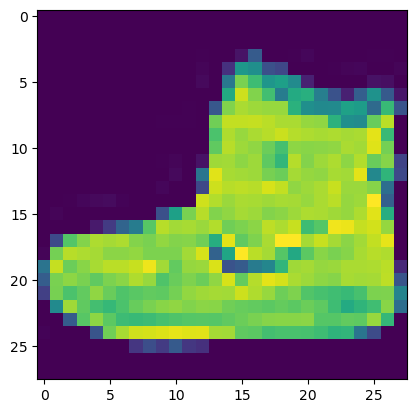

Reconstructed Image


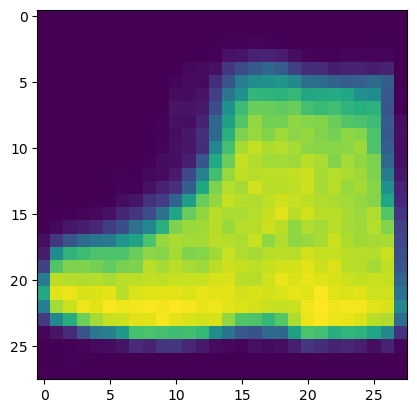

[3.98865505]
9
1/1 [==============================] - 0s 43ms/step
Original Image


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


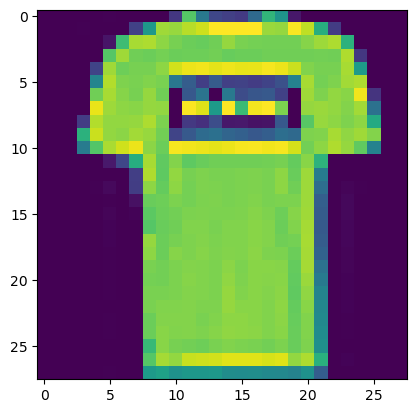

Reconstructed Image


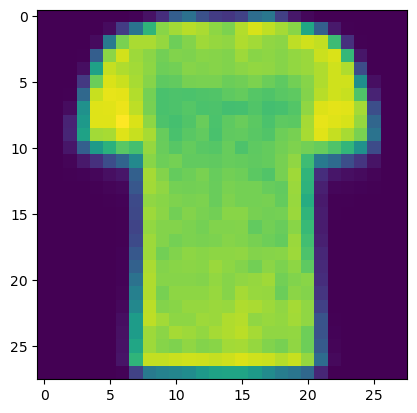

[4.58299161]
0


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


1/1 [==============================] - 0s 43ms/step
Original Image


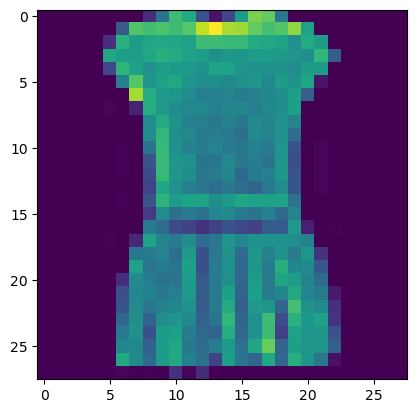

Reconstructed Image


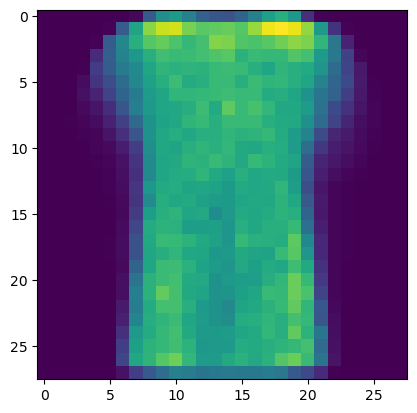

[3.28239473]
3
1/1 [==============================] - 0s 26ms/step
Original Image


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


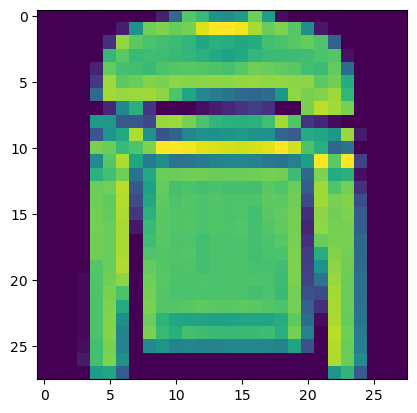

Reconstructed Image


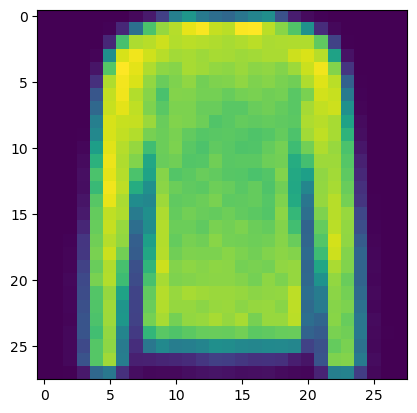

[4.26459363]
2
1/1 [==============================] - 0s 28ms/step
Original Image


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


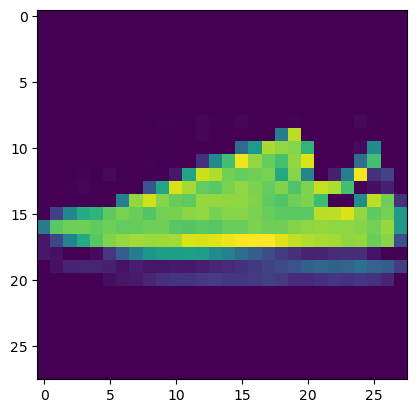

Reconstructed Image


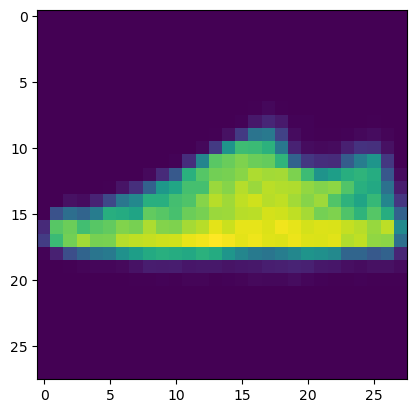

[3.32398196]
7
1/1 [==============================] - 0s 32ms/step
Original Image


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


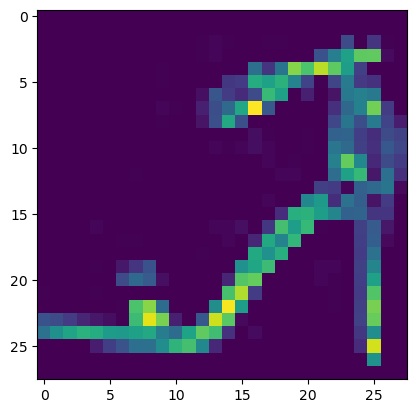

Reconstructed Image


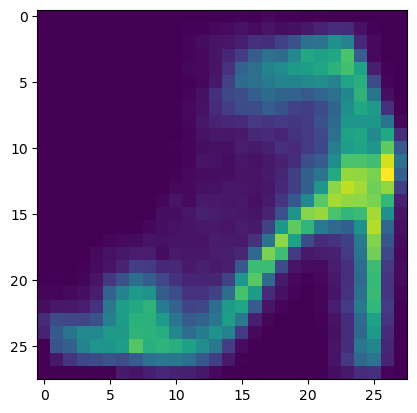

[4.10909163]
5
1/1 [==============================] - 0s 35ms/step
Original Image


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


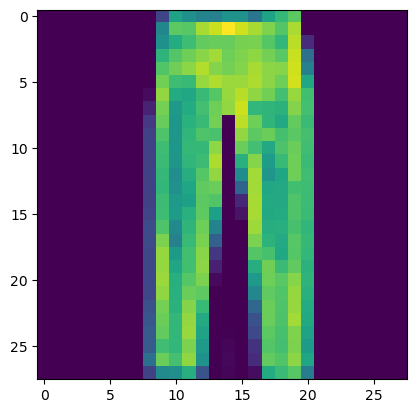

Reconstructed Image


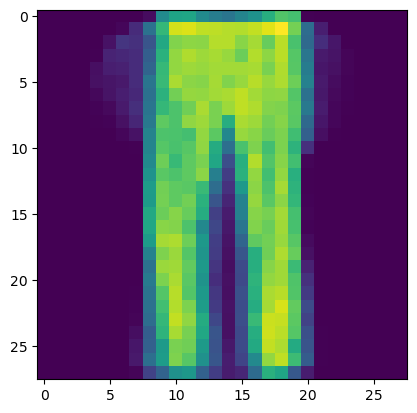

[3.93484407]
1
1/1 [==============================] - 0s 31ms/step
Original Image


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


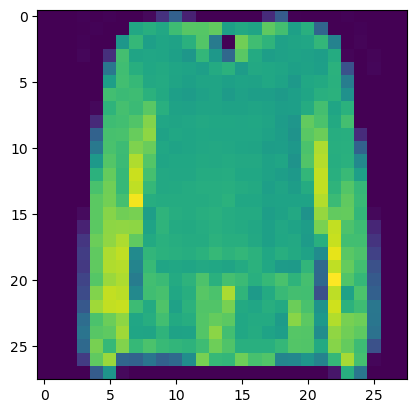

Reconstructed Image


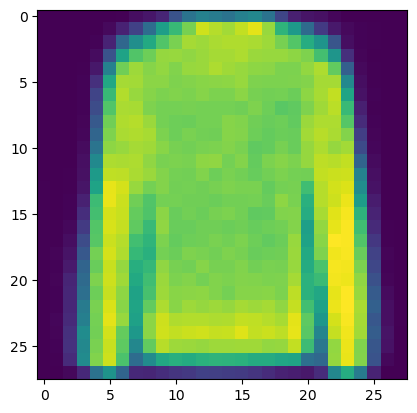

[2.92458805]
6
1/1 [==============================] - 0s 27ms/step
Original Image


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


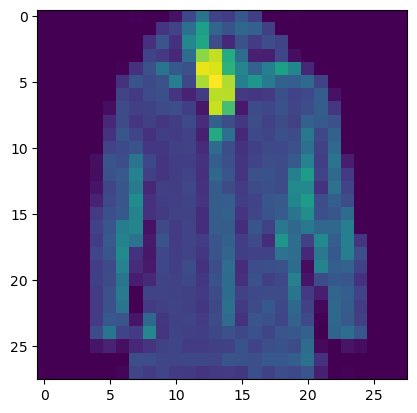

Reconstructed Image


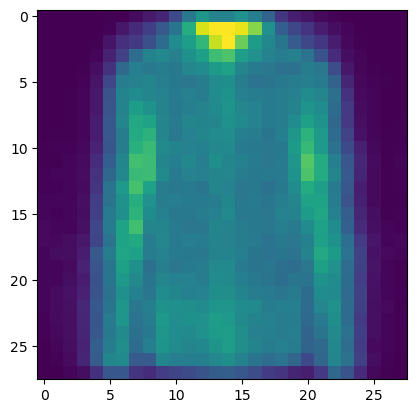

[3.2659222]
4
1/1 [==============================] - 0s 24ms/step
Original Image


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


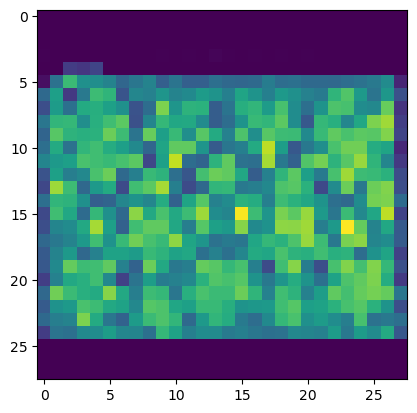

Reconstructed Image


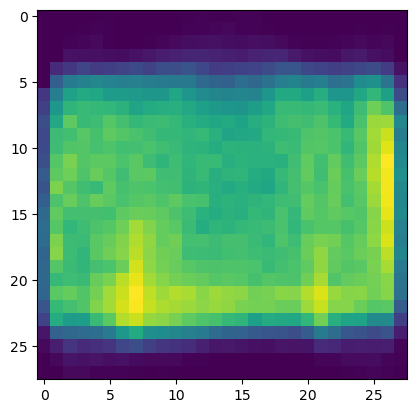

[3.9774517]
8


C:\Users\antoi\AppData\Local\Temp\ipykernel_24484\836432810.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)


In [32]:
ranking = pd.DataFrame(columns = ['Label', 'Reconstruction Loss'])
for i in [0, 1, 3, 5, 6, 8, 16, 18, 19,23]:
    x_img = X_train_s[i]
    inputs = x_img.reshape(1,784)
    target_data = trained_modelLessLayer.model.predict(inputs)
    dist = np.linalg.norm(inputs - target_data, axis=-1)
    print("Original Image")
    plt.imshow(X_train[i])
    plt.show()
    print("Reconstructed Image")
    plt.imshow(target_data.reshape(28,28))
    plt.show()
    print(dist)
    label = Y_train[i]
    print(label)
    ranking = ranking.append({'Label': label, 'Reconstruction Loss': dist}, ignore_index = True)
    

In [33]:
ranking.sort_values(by = ['Reconstruction Loss'])

,Label,Reconstruction Loss
7,6,[2.924588049218657]
8,4,[3.265922201805214]
2,3,[3.282394727547452]
4,7,[3.323981961281386]
6,1,[3.9348440734291117]
9,8,[3.9774517038588297]
0,9,[3.9886550503579254]
5,5,[4.109091634397569]
3,2,[4.264593631162541]
1,0,[4.582991608463359]


3 top performers are:

6 Shirt,
3 Dress,
4 Coat

3 worst performers are:

5 Sandal,
2 Pullover,
0 T-shirt/top